# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [13]:
#Starter Code

from bs4 import BeautifulSoup
import requests


url = 'https://www.azlyrics.com/l/laroux.html' #Put the URL of your AZLyrics Artist Page here!

html_page = requests.get(url) #Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing
albums = soup.find_all("div", class_="album")
album = albums[0]
print(type(album))
print(album.findNextSiblings('a'))

#The example from our lecture/reading
data = [] #Create a storage container
for album_n in range(len(albums)):
    #On the last album, we won't be able to look forward
    if album_n == len(albums)-1:
        cur_album = albums[album_n]
        album_songs = cur_album.findNextSiblings('a')
        for song in album_songs:
            page = song.get('href')
            title = song.text
            album = cur_album.text
            data.append((title, page, album))
    else:
        cur_album = albums[album_n]
        next_album = albums[album_n+1]
        saca = cur_album.findNextSiblings('a') #songs after current album
        sbna = next_album.findPreviousSiblings('a') #songs before next album
        album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
        for song in album_songs:
            page = song.get('href')
            title = song.text
            album = cur_album.text
            data.append((title, page, album))
data[:2]

<class 'bs4.element.Tag'>
[<a href="../lyrics/laroux/inforthekill.html" target="_blank">In For The Kill</a>, <a href="../lyrics/laroux/tigerlily.html" target="_blank">Tigerlily</a>, <a href="../lyrics/laroux/quicksand.html" target="_blank">Quicksand</a>, <a href="../lyrics/laroux/bulletproof.html" target="_blank">Bulletproof</a>, <a href="../lyrics/laroux/colourlesscolour.html" target="_blank">Colourless Colour</a>, <a href="../lyrics/laroux/imnotyourtoy.html" target="_blank">I'm Not Your Toy</a>, <a href="../lyrics/laroux/covermyeyes.html" target="_blank">Cover My Eyes</a>, <a href="../lyrics/laroux/asifbymagic.html" target="_blank">As If By Magic</a>, <a href="../lyrics/laroux/fascination.html" target="_blank">Fascination</a>, <a href="../lyrics/laroux/reflectionsareprotections.html" target="_blank">Reflections Are Protections</a>, <a href="../lyrics/laroux/armourlove.html" target="_blank">Armour Love</a>, <a href="../lyrics/laroux/growingpains.html" target="_blank">Growing Pains</a>

[('In For The Kill',
  '../lyrics/laroux/inforthekill.html',
  'album: "La Roux" (2009)'),
 ('Tigerlily', '../lyrics/laroux/tigerlily.html', 'album: "La Roux" (2009)')]

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [15]:
#Remember to open up the webpage in a browser and control-click/right-click and go to inspect!
from bs4 import BeautifulSoup
import requests

#Example page
url = 'https://www.azlyrics.com/lyrics/laroux/inforthekillremix.html'


html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')
soup.prettify()[:1000]

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content=\'Lyrics to "In For The Kill (Remix)" song by La Roux: We can fight our desires But when we start making fires We get ever so hot Whether we like it or not...\' name="description"/>\n  <meta content="In For The Kill (Remix) lyrics, La Roux In For The Kill (Remix) lyrics, La Roux lyrics" name="keywords"/>\n  <meta content="noarchive" name="robots"/>\n  <meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>\n  <title>\n   La Roux - In For The Kill (Remix) Lyrics | AZLyrics.com\n  </title>\n  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>\n  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>\n  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->\n  <!--[if lt 

In [21]:
main_div = soup.find("div", class_ = "col-xs-12 col-lg-8 text-center")
ringtone = main_div.find("div", class_ = "ringtone")
lyrics_div = ringtone.findNextSibling("div")
lyrics = lyrics_div.text
print(lyrics)



[La Roux:]
We can fight our desires
But when we start making fires
We get ever so hot
Whether we like it or not
They say we can love who we trust
But what is love without lust?
Two hearts with accurate devotions
And what are feelings without emotions?

[Chorus x2:]
I’m going in for the kill
I’m doing it for a thrill
Oh I’m hoping you’ll understand
And not let go of my hand

[Kanye West:]
I’m going in and I’ma go hard
I mean whats the point if it aint no scars
a little teeth marks
blood on the collar
thats real love mhmmmm
she said, ugh
how could you love someone that hurt you, played you, spoke to provoke you?
how could you love someone that burns you, turns you into a werewolf?
and in the moment you might do some things you’re not aware of
no-ones prepared for the scale of this not a failure
and more and more more more drama looking for a score
state you’re looking for a tour
her allure’s more couture, tailor-made
til you screams in rage
I mean uhhhhhm breaking out the damn cage
han

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [37]:

url = 'https://www.azlyrics.com/l/laroux.html' #Put the URL of your AZLyrics Artist Page here!

html_page = requests.get(url) #Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing
albums = soup.find_all("div", class_="album")
print(albums)
album = albums[0]

#The example from our lecture/reading
data = [] #Create a storage container
for album_n in range(len(albums)):
    print(album_n, albums[album_n])
    #On the last album, we won't be able to look forward
    if album_n == len(albums)-1:
        cur_album = albums[album_n]
        album_songs = cur_album.findNextSiblings('a')
        print(album_songs)
        for song in album_songs:
            page = song.get('href')
            title = song.text
            album = cur_album.text
            print(song_url)            
            song_url = 'https://www.azlyrics.com' + page[2:]
            song_html_page = requests.get(song_url)
            song_soup = BeautifulSoup(song_html_page.content, 'html.parser')      
            main_div = song_soup.find("div", class_ = "col-xs-12 col-lg-8 text-center")
            ringtone = main_div.find("div", class_ = "ringtone")
            lyrics_div = ringtone.findNextSibling("div")
            lyrics = lyrics_div.text
            data.append((title, page, album, lyrics))
    else:
        cur_album = albums[album_n]
        next_album = albums[album_n+1]
        saca = cur_album.findNextSiblings('a') #songs after current album
        sbna = next_album.findPreviousSiblings('a') #songs before next album
        album_songs = [song for song in saca if (song in sbna) & (song.text != '')] #album songs are those listed after the current album but before the next one!
        print(album_songs)
        for song in album_songs:
            page = song.get('href')
            title = song.text
            album = cur_album.text
            song_url = 'https://www.azlyrics.com' + page[2:]
            print(song_url)
            song_html_page = requests.get(song_url)
            song_soup = BeautifulSoup(song_html_page.content, 'html.parser')      
            main_div = song_soup.find("div", class_ = "col-xs-12 col-lg-8 text-center")
            ringtone = main_div.find("div", class_ = "ringtone")
            lyrics_div = ringtone.findNextSibling("div")
            lyrics = lyrics_div.text
            data.append((title, page, album, lyrics))
data[:2]

[<div class="album">album: <b>"La Roux"</b> (2009)</div>, <div class="album">album: <b>"Trouble In Paradise"</b> (2014)</div>, <div class="album">other songs:</div>]
0 <div class="album">album: <b>"La Roux"</b> (2009)</div>
[<a href="../lyrics/laroux/inforthekill.html" target="_blank">In For The Kill</a>, <a href="../lyrics/laroux/tigerlily.html" target="_blank">Tigerlily</a>, <a href="../lyrics/laroux/quicksand.html" target="_blank">Quicksand</a>, <a href="../lyrics/laroux/bulletproof.html" target="_blank">Bulletproof</a>, <a href="../lyrics/laroux/colourlesscolour.html" target="_blank">Colourless Colour</a>, <a href="../lyrics/laroux/imnotyourtoy.html" target="_blank">I'm Not Your Toy</a>, <a href="../lyrics/laroux/covermyeyes.html" target="_blank">Cover My Eyes</a>, <a href="../lyrics/laroux/asifbymagic.html" target="_blank">As If By Magic</a>, <a href="../lyrics/laroux/fascination.html" target="_blank">Fascination</a>, <a href="../lyrics/laroux/reflectionsareprotections.html" targe

[('In For The Kill',
  '../lyrics/laroux/inforthekill.html',
  'album: "La Roux" (2009)',
  "\n\r\nWe can fight our desires\nBut when we start making fires\nWe get ever so hot\nWhether we like it or not\n\nThey say we can love who we trust\nBut what is love without lust\nTwo hearts with accurate devotions\nBut what are feelings without emotions?\n\nI'm going in for the kill\nI'm doing it for a thrill\nOh, I'm hoping you'll understand\nAnd not let go of my hand\n\nI'm going in for the kill\nI'm doing it for a thrill\nOh, I'm hoping you'll understand\nAnd not let go of my hand\n\nI hang my hopes out on the line\nWell they'll be ready for you in time\nIf you leave them out too long\nThey'll be withered by the sun\n\nFull stops and exclamation marks\nMy words stumble before I start\nHow far can you send emotions?\nCan this bridge cross the ocean?\n\nI'm going in for the kill\nI'm doing it for a thrill\nOh, I'm hoping you'll understand\nAnd not let go of my hand\n\nI'm going in for the kill

In [48]:
import pandas as pd
df = pd.DataFrame(data = data, columns = ['title', 'link', 'album', 'lyrics'])
df['album'] = df['album'].apply(lambda x: x.strip('album: '))
df['lyrics'] = df['lyrics'].apply(lambda x: x.replace('\n', '').replace('\r', ''))
df

,title,link,album,lyrics
0,In For The Kill,../lyrics/laroux/inforthekill.html,"""La Roux"" (2009)",We can fight our desiresBut when we start maki...
1,Tigerlily,../lyrics/laroux/tigerlily.html,"""La Roux"" (2009)",Well tonight out on the streets I'm gonna foll...
2,Quicksand,../lyrics/laroux/quicksand.html,"""La Roux"" (2009)",Oo-oo-oo-ooOo-oo-oo-ooI'm the obsessorHolding ...
3,Bulletproof,../lyrics/laroux/bulletproof.html,"""La Roux"" (2009)","Been there, done that, messed aroundI'm having..."
4,Colourless Colour,../lyrics/laroux/colourlesscolour.html,"""La Roux"" (2009)",You say it's comingBut I can't see it at allYo...
5,I'm Not Your Toy,../lyrics/laroux/imnotyourtoy.html,"""La Roux"" (2009)","Love, love is like a stubborn youthThat you'd ..."
6,Cover My Eyes,../lyrics/laroux/covermyeyes.html,"""La Roux"" (2009)",No wonder I'm scared to look in your eyesYou'v...
7,As If By Magic,../lyrics/laroux/asifbymagic.html,"""La Roux"" (2009)",Emerging from my worldImagine living in a boxA...
8,Fascination,../lyrics/laroux/fascination.html,"""La Roux"" (2009)",It's been seven hours longAnd you're shadow st...
9,Reflections Are Protections,../lyrics/laroux/reflectionsareprotections.html,"""La Roux"" (2009)","Please, please be my light filterShine, make m..."


## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

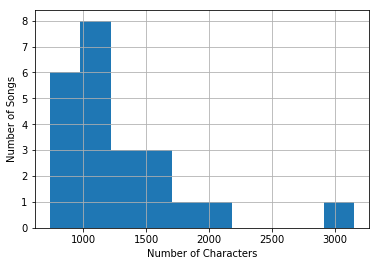

In [55]:
import matplotlib.pyplot as plt
#Use this block for your code!
df['song_len'] = df['lyrics'].apply(lambda x: len(x))
df.song_len.hist()
plt.xlabel('Number of Characters')
plt.ylabel('Number of Songs')
plt.show()

## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

In [ ]:
#Use this block for your code!

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!